# 张量运算函数

- 下面三个函数有两种使用方式：
    - torch模块的全局函数
    - Tensor类中的成员函数

## mm与addmm运算

### mm函数说明

- mm是矩阵与矩阵的乘法（内积）封装，这个函数只多矩阵运算，所以其源代码会检测输入向量的维度，维度必须是2维的。
    
```python
    torch.mm(input, mat2, out=None) → Tensor
```

- 参数说明：
    - input：运算矩阵
    - mat2：第二个矩阵

### addmm函数说明
- 计算公式是
    - $\text{out} = \beta\ \text{input} + \alpha\ (\text{mat1} \mathbin{@} \text{mat2})$

```python
    addmm(beta=1, input, alpha=1, mat1, mat2, out=None) -> Tensor
```

- 参数说明：
    - beta：对应上面公式中的$\beta$
    - input：对应上面公式中的$\text{input}$
    - alpha：对应上面公式中的$\alpha$
    - mat1：对应上面公式中的$\text{mat1} $
    - mat2：对应上面公式中的$\text{mat2} $

### 使用例子

1. mm函数的使用例子

In [6]:
import torch

m_input = torch.Tensor(
    [
        [1, 2],
        [3, 4],
        [5, 6]
    ]
)

mat2 = torch.Tensor(
    [
        [1, 2, 3],
        [4, 5, 6]
    ]
)
# vec2 = torch.Tensor(
#     [1,2]
# )

out = torch.mm(m_input, mat2)
print(out)
# out = torch.mm(m_input, vec2)
# print(out)

tensor([[ 9., 12., 15.],
        [19., 26., 33.],
        [29., 40., 51.]])


2. addmm函数的使用例子

In [8]:
import torch

m_input = torch.Tensor(
    [
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]
    ]
)

mat1 = torch.Tensor(
    [
        [1, 2],
        [3, 4],
        [5, 6]
    ]
)

mat2 = torch.Tensor(
    [
        [1, 2, 3],
        [4, 5, 6]
    ]
)

out = torch.addmm(input=m_input, mat1=mat1, mat2=mat2, beta=1, alpha=1)
print(out)

tensor([[10., 14., 18.],
        [23., 31., 39.],
        [36., 48., 60.]])


## mv与addmv运算

- mv/addmv与mm/addmm函数类似，不过是矩阵与向量间的运算公式
    - mv是矩阵与向量的内积
    - addmv的计算公式是：$\text{out} = \beta\ \text{input} + \alpha\ (\text{mat} \mathbin{@} \text{vec})$

- 注意：
    - 矩阵与向量的运算，最后输出的是向量

### mv函数说明

```python
    torch.mv(input, vec, out=None) -> Tensor
```

### addmv函数说明

```python
    torch.addmv(beta=1, input, alpha=1, mat, vec, out=None) -> Tensor
```

### 使用例子

1. mv函数使用例子

In [10]:
import torch

m_input = torch.Tensor(
    [
        [1, 2, 3],
        [4, 5, 6]
    ]
)

vec = torch.Tensor(
    [1, 2, 3]
)

out = torch.mv(input=m_input, vec=vec)
print(out)   # 输出的是向量

tensor([14., 32.])


2. addmv使用例子

In [13]:
import torch

m_input = torch.Tensor(
    [1, 2, 3]
)

mat = torch.Tensor(
    [
        [1, 2],
        [3, 4],
        [5, 6]
    ]
)

vec = torch.Tensor(
    [1, 2]
)

out = torch.addmv(input=m_input, mat=mat, vec=vec, beta=1, alpha=1)
print(out)    # 输出的是向量

tensor([ 6., 13., 20.])


## addbmm函数

- addbmm函数批量操作，其封装的计算公式如下：
    - $out = \beta\ \text{input} + \alpha\ (\sum_{i=0}^{b-1} \text{batch1}_i \mathbin{@} \text{batch2}_i)$
    
    - 其中的b表示batch维度，也就是batch1与batch2是3维矩阵，第一维表示批量大小。
    
- 这个函数用来图像运算比较方便，因为图像包含颜色深度。

### addbmm函数说明

```python
    torch.addbmm(beta=1, input, alpha=1, batch1, batch2, out=None) -> Tensor
```

### 使用例子

In [14]:
import torch

M = torch.randn(3, 5)
batch1 = torch.randn(10, 3, 4)    # 10表示批次
batch2 = torch.randn(10, 4, 5)   # 10表示批次

out = torch.addbmm(M, batch1, batch2)
print(out)

tensor([[  3.3873,  -1.3027,   2.8728,  -0.7336,   7.9643],
        [ -3.1864,  -0.2114,  -2.7413,  -5.1329,   0.3058],
        [ -9.4950,  -2.7834, -13.0682,  -6.0314,   3.7112]])


In [18]:
import torch

m_input = torch.Tensor(
    [
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]
    ]
)

mat1 = torch.Tensor(
    [
        [
            [1, 2],
            [3, 4],
            [5, 6]
        ],   # batch =1
    ]
)

mat2 = torch.Tensor(
    [
        [
            [1, 2, 3],
            [4, 5, 6]
        ], # batch =1
    ]
)

out = torch.addbmm(input=m_input, batch1=mat1, batch2=mat2, beta=1, alpha=1)    # 要求batch必须是三维
print(out)

tensor([[10., 14., 18.],
        [23., 31., 39.],
        [36., 48., 60.]])


# 模块torch.nn函数

## 卷积运算函数

- 主要使用2D卷积做图像处理，所以下面只讲解下2D卷积。

### 函数说明

```python
    torch.nn.functional.conv2d(
        input,             # 被处理2D矩阵
        weight,           # 2D卷积核（共享权重）
        bias=None,     # 2D偏置项
        stride=1,         # 卷积运算的步长，可以是一个整数（表示高宽使用相同的步长）或者元组（表示高宽使用不同的步长）。
        padding=0,     # 补边长度（这个需要手工计算传入） 
        dilation=1,       # dilation卷积核的间隔，可以一个整数（表示两个方向一样），或者元组（表示两个方向）
        groups=1) → Tensor
```

- 核心参数格式说明：
    - input：四维张量Tensor，维度说明(批量数，深度，高度，宽度)
    - weight：四维张量Tensor，维度说明（输出数， 深度，高度，宽度）
        - 如果指定groups，则深度分成组计算，则是个维度为（输出数， 深度/groups，高度，宽度）
    -  bias：卷积运算的偏置项，一维张量，维度为（输出数）

### 使用例子

- 例子中，使用图像来说明

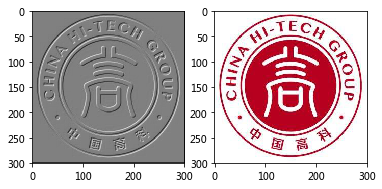

In [60]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt

org_imgs = plt.imread("datasets/hi.jpeg")
num_imgs = org_imgs.transpose(2, 0, 1)    # 变换下维度（根据卷积函数的要求，把深度变成第一维）

# 批量（图像数量）1，深度3，高300，宽300
input = torch.from_numpy(num_imgs).view(
    1,     # 批量
    num_imgs.shape[0],    # 深度
    num_imgs.shape[1],    # 高度
    num_imgs.shape[2]).double()    # 宽度

# 定义卷积核
kernel = torch.DoubleTensor(
     [
         [
             [-1, -1,  0],
             [-1,  0,  1],
             [ 0,   1,  1]
         ],
        [
             [-1, -1,  0],
             [-1,  0,  1],
             [ 0,   1,  1]
         ],
        [
             [-1, -1,  0],
             [-1,  0,  1],
             [ 0,   1,  1]
         ]
     ]
 ).view(1, 3, 3 ,3)   # 输出一副图像，深度是3，高度是3，宽度是3
# print(input.shape)
# print(kernel.shape)
# 注意：卷积核是3大小，padding就是1，卷积核大小是5，则padding就是2，如果padding=0,则输出图像高宽-2
out_image = torch.conv2d(input, kernel, padding=1, bias=torch.DoubleTensor([0]))
# print(out_image)

ax1 = plt.subplot(121)
# ax1.imshow(out_image.numpy()[0][0])    # 图像深度是1，表示灰度图
ax1.imshow(out_image.numpy()[0][0], cmap='gray')
ax2 = plt.subplot(122)
ax2.imshow(org_imgs, cmap='gray')    # 图像深度是3，表示彩色图像
# print( out_image.numpy()[0][0].shape)


## 池化运算函数

- 池化运算主要是降维，这是用于卷积神经网络的运算。
- 池化运算一般有两种方式：
    - 平均池化
    - 最大池化
- 池化的核的大小决定了降维的多少：
    - 2 * 2 的池化核：输出是输入的一半。

### 函数说明

1. 平均池化函数

```python 
    torch.nn.functional.avg_pool2d(input, kernel_size, stride=None, padding=0, ceil_mode=False, count_include_pad=True, divisor_override=None) → Tensor
```

- 重要参数说明：
    - input：(minibatch,in_channels,iH,iW)与卷积的输入是一致的；
    - kernel_size：池化核大小（不需要数据）：使用整数或者元组；
    - padding：补边大小（补边用于池化的cell够用）；
    - count_include_pad : 计算平均的时候，是否考虑padding的0；
    - ceil_mode：当计算输出形状的时候，采用取最大（ceil）还是最小（floor）；

2. 最大池化函数

```python
    torch.nn.functional.max_pool2d(*args, **kwargs)
```

- 说明：
    - 与平均池化一样，差异就是运算方式不同：
        - 平均池化：取平均数作为输出
        - 最大池化：取最大值作为输出

### 使用例子

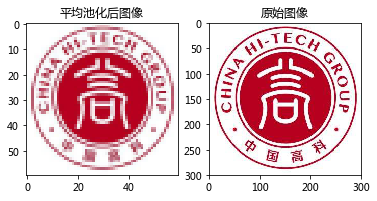

In [79]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt

org_imgs = plt.imread("datasets/hi.jpeg")
num_imgs = org_imgs.transpose(2, 0, 1)    # 变换下维度（根据卷积函数的要求，把深度变成第一维）

# 批量（图像数量）1，深度3，高300，宽300
input = torch.from_numpy(num_imgs).view(
    1,     # 批量
    num_imgs.shape[0],    # 深度
    num_imgs.shape[1],    # 高度
    num_imgs.shape[2]).double()    # 宽度

out = torch.nn.functional.avg_pool2d(input=input, kernel_size=5)
# print(out.shape)

out_image = out[0].byte().numpy()
out_image = out_image.transpose([1, 2, 0])
# out_image[out_image>=255] =255
# out_image[out_image<=0] =0
ax1 = plt.subplot(121, title="平均池化后图像")
ax1.imshow(out_image)

ax2 = plt.subplot(122, title="原始图像")
ax2.imshow(org_imgs)    # 图像深度是3，表示彩色图像

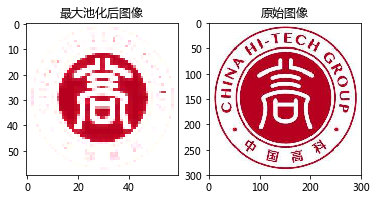

In [78]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt

org_imgs = plt.imread("datasets/hi.jpeg")
num_imgs = org_imgs.transpose(2, 0, 1)    # 变换下维度（根据卷积函数的要求，把深度变成第一维）

# 批量（图像数量）1，深度3，高300，宽300
input = torch.from_numpy(num_imgs).view(
    1,     # 批量
    num_imgs.shape[0],    # 深度
    num_imgs.shape[1],    # 高度
    num_imgs.shape[2]).double()    # 宽度

out = torch.nn.functional.max_pool2d(input=input, kernel_size=5)   # 调整池化核
# print(out.shape)

out_image = out[0].byte().numpy()
out_image = out_image.transpose([1, 2, 0])
# out_image[out_image>=255] =255
# out_image[out_image<=0] =0
ax1 = plt.subplot(121, title="最大池化后图像")
ax1.imshow(out_image)

ax2 = plt.subplot(122, title="原始图像")
ax2.imshow(org_imgs)    # 图像深度是3，表示彩色图像

## dropout函数

- dropout函数有多个：
    - dropout：随机屏蔽训练元素；
    - alpha_dropout：采用伯努利分布随机屏蔽训练元素，同时还做标准化处理；
    - dropout2d：对2D的数据进行随机屏蔽；
    - dropout3d：对3D的数据进行随机屏蔽；

### 函数说明

1. dropput函数

```python
    torch.nn.functional.dropout(input, p=0.5, training=True, inplace=False)
```

- 参数说明：
    - p表示被屏蔽的数据（屏蔽数据就是数据置零）

2. alpha_dropout函数

```python
    torch.nn.functional.alpha_dropout(input, p=0.5, training=False, inplace=False)
```

3. dropout2d函数

```python
    torch.nn.functional.dropout2d(input, p=0.5, training=True, inplace=False)
```

- 参数说明：
    - input：格式按照上面conv2d与avg_pool2d一样使用；

4. dropout3d函数

```python
    torch.nn.functional.dropout3d(input, p=0.5, training=True, inplace=False)
```

### 使用例子

1. dropout的例子
    - 从下面例子从可以知道，dropout后，还是保持均值不变（这个特性在选在不同dropout函数的时候，需要考虑）

tensor(192.1158, dtype=torch.float64) tensor(8295.0039, dtype=torch.float64)
tensor(192.1322, dtype=torch.float64) tensor(13311.1657, dtype=torch.float64)


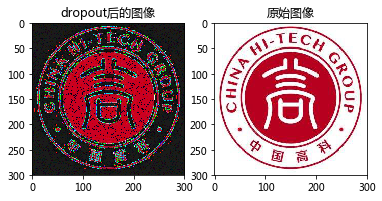

In [118]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt

org_imgs = plt.imread("datasets/hi.jpeg")
num_imgs = org_imgs.transpose(2, 0, 1)    # 变换下维度（根据卷积函数的要求，把深度变成第一维）

# 批量（图像数量）1，深度3，高300，宽300
input = torch.from_numpy(num_imgs).view(
    1,     # 批量
    num_imgs.shape[0],    # 深度
    num_imgs.shape[1],    # 高度
    num_imgs.shape[2]).double()    # 宽度
print(input.mean(), input.var())
out = torch.nn.functional.dropout(input=input, p=0.1, training=True)   # 调整池化核
print(out.mean(), out.var())

out_image = out[0].byte().numpy()
out_image = out_image.transpose([1, 2, 0])
# print(out_image)
ax1 = plt.subplot(121, title="dropout后的图像")
ax1.imshow(out_image, cmap="gray")

ax2 = plt.subplot(122, title="原始图像")
ax2.imshow(org_imgs, cmap="gray")    # 图像深度是3，表示彩色图像

2. alpha_dropout例子

    - alpha_dropout函数保持方差不变

tensor(192.1158, dtype=torch.float64) tensor(8295.0039, dtype=torch.float64)
tensor(159.2412, dtype=torch.float64) tensor(9212.0347, dtype=torch.float64)


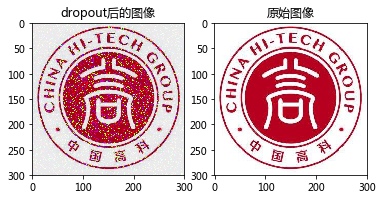

In [119]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt

org_imgs = plt.imread("datasets/hi.jpeg")
num_imgs = org_imgs.transpose(2, 0, 1)    # 变换下维度（根据卷积函数的要求，把深度变成第一维）

# 批量（图像数量）1，深度3，高300，宽300
input = torch.from_numpy(num_imgs).view(
    1,     # 批量
    num_imgs.shape[0],    # 深度
    num_imgs.shape[1],    # 高度
    num_imgs.shape[2]).double()    # 宽度
print(input.mean(), input.var())
out = torch.nn.functional.alpha_dropout(input=input, p=0.1, training=True)   # 调整池化核
print(out.mean(), out.var())

out_image = out[0].byte().numpy()
out_image = out_image.transpose([1, 2, 0])
# print(out_image)
ax1 = plt.subplot(121, title="dropout后的图像")
ax1.imshow(out_image, cmap="gray")

ax2 = plt.subplot(122, title="原始图像")
ax2.imshow(org_imgs, cmap="gray")    # 图像深度是3，表示彩色图像

3. dropout2d例子
    - dropout2d是作用在整个通道上。

tensor(192.1158, dtype=torch.float64) tensor(8295.0039, dtype=torch.float64)
tensor(384.2315, dtype=torch.float64) tensor(33180.0157, dtype=torch.float64)


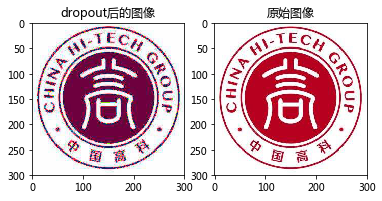

In [150]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt

org_imgs = plt.imread("datasets/hi.jpeg")
num_imgs = org_imgs.transpose(2, 0, 1)    # 变换下维度（根据卷积函数的要求，把深度变成第一维）

# 批量（图像数量）1，深度3，高300，宽300
input = torch.from_numpy(num_imgs).view(
    1,     # 批量
    num_imgs.shape[0],    # 深度
    num_imgs.shape[1],    # 高度
    num_imgs.shape[2]).double()    # 宽度
print(input.mean(), input.var())
out = torch.nn.functional.dropout2d(input=input, p=0.5, training=True)   # 调整池化核
print(out.mean(), out.var())

out_image = out[0].byte().numpy()
out_image = out_image.transpose([1, 2, 0])
# print(out_image)
ax1 = plt.subplot(121, title="dropout后的图像")
ax1.imshow(out_image)

ax2 = plt.subplot(122, title="原始图像")
ax2.imshow(org_imgs,)    # 图像深度是3，表示彩色图像

### dropout与dropout2d的区别

- alpha_dropout与dropout/dropout2d区别在于标准化，但是dropout与dropout2d的在于dropout的方式。
    - dropout是对所有元素随机；
    - dropout2d是像素（3个通道要么全部置零，要么保持原状）随机；
    
- 下面是一个例子说明：

1. dropout函数

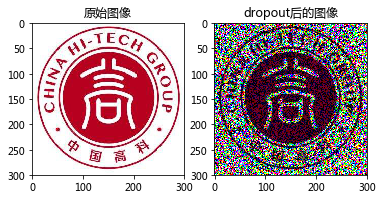

In [16]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt

org_imgs = plt.imread("datasets/hi.jpeg")
input = torch.from_numpy(org_imgs).double()

out = torch.nn.functional.dropout(input=input, p=0.5, training=True)   # 只对浮点数运算
# -----------------
ax1 = plt.subplot(121, title="原始图像")
ax1.imshow(org_imgs)    # 图像深度是3，表示彩色图像
ax2 = plt.subplot(122, title="dropout后的图像")
ax2.imshow(out.byte().numpy())



2. dropout2d函数
    - 使用第三维作为通道。效果是要么黑色，要么红色，因为这是多整个像素操作，把像素置零。

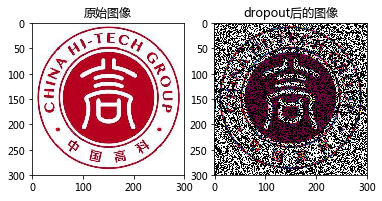

In [1]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt

org_imgs = plt.imread("datasets/hi.jpeg")
input = torch.from_numpy(org_imgs).double()

out = torch.nn.functional.dropout2d(input=input, p=0.5, training=True)   # 只对浮点数运算
# -----------------
ax1 = plt.subplot(121, title="原始图像")
ax1.imshow(org_imgs)    # 图像深度是3，表示彩色图像
ax2 = plt.subplot(122, title="dropout后的图像")
ax2.imshow(out.byte().numpy())

## 线性运算函数

- 线性函数仅仅是针对所有维数的，但我们通常使用的还是二维矩阵。

### linear函数
- $y = xA^T + b$

### bilinear函数

- $y = x_1 A x_2 + b$

### linear使用例子

1. 首先关注形状

In [2]:
import torch

x = torch.randn(2, 4)    # 
A = torch.randn(3, 4)
b = torch.randn(2, 3)

out = torch.nn.functional.linear(input=x, weight=A, bias=b)
print(out)

tensor([[ 2.6883,  1.2959,  0.0287],
        [-0.4045,  0.4580, -2.5265]])


2. 然后关注计算规则（内积）。

In [3]:
import torch

x = torch.LongTensor(  # 2*4
    [
        [1, 2, 3, 4],
        [5, 6, 7, 8]
    ]
)
A = torch.LongTensor(   # 3*4
    [
        [1, 2, 3, 4],
        [5, 6, 7, 8],
        [1, 1, 1, 1]
    ]
)
b = torch.LongTensor(   # 2 * 3
    [
        [1, 2, 3],
        [5, 6, 7]
    ]
)

out = torch.nn.functional.linear(input=x, weight=A, bias=b)
print(out)

tensor([[ 31,  72,  13],
        [ 75, 180,  33]])


3. 多维的情况
    - 关于维数的说明：
        - Input: $(N, *, in\_features)$ 其中 `*` 表示任意多个维度
        - Weight: $(out\_features, in\_features)$
        - Bias: $(out\_features)$
        - Output: $(N, *, out\_features)$

In [7]:
import torch

x = torch.randn(2, 3, 5, 4)    # N=2, * (3, 5),𝑖𝑛_𝑓𝑒𝑎𝑡𝑢𝑟𝑒𝑠=4
A = torch.randn(3, 4)          # 𝑜𝑢𝑡_𝑓𝑒𝑎𝑡𝑢𝑟𝑒𝑠= 3, 𝑖𝑛_𝑓𝑒𝑎𝑡𝑢𝑟𝑒𝑠=4
b = torch.randn(3)              #  𝑜𝑢𝑡_𝑓𝑒𝑎𝑡𝑢𝑟𝑒𝑠= 3
b = torch.Tensor([88, 888, 8888])

out = torch.nn.functional.linear(input=x, weight=A, bias=b)
print(out.shape)    # N=2,   * (3, 5), 𝑜𝑢𝑡_𝑓𝑒𝑎𝑡𝑢𝑟𝑒𝑠= 3
print(out)

torch.Size([2, 3, 5, 3])
tensor([[[[  87.6084,  888.8325, 8889.0488],
          [  89.4753,  889.6735, 8886.3359],
          [  88.0262,  890.7296, 8890.6123],
          [  89.7283,  890.1259, 8886.5527],
          [  86.9266,  891.3016, 8888.4502]],

         [[  87.8339,  890.9385, 8889.3877],
          [  88.5911,  889.2175, 8889.3818],
          [  85.6238,  885.1033, 8887.4404],
          [  88.8761,  887.0152, 8885.6064],
          [  86.9773,  885.6030, 8887.9336]],

         [[  88.2102,  889.2548, 8889.2451],
          [  89.2577,  885.4579, 8883.8271],
          [  87.3587,  888.9655, 8887.9131],
          [  88.3702,  888.2765, 8886.4570],
          [  87.8151,  886.6364, 8887.6582]]],


        [[[  86.8274,  888.8477, 8889.2188],
          [  87.7344,  888.5159, 8889.4189],
          [  88.3876,  887.8715, 8888.4531],
          [  90.0545,  885.2833, 8887.1396],
          [  90.2269,  889.3709, 8885.2266]],

         [[  87.8483,  889.3448, 8888.0000],
          [  89.7446

In [8]:
import torch

x = torch.randn(2, 4)    # N=2, * (3, 5),𝑖𝑛_𝑓𝑒𝑎𝑡𝑢𝑟𝑒𝑠=4
A = torch.randn(3, 4)          # 𝑜𝑢𝑡_𝑓𝑒𝑎𝑡𝑢𝑟𝑒𝑠= 3, 𝑖𝑛_𝑓𝑒𝑎𝑡𝑢𝑟𝑒𝑠=4
b = torch.randn(3)              #  𝑜𝑢𝑡_𝑓𝑒𝑎𝑡𝑢𝑟𝑒𝑠= 3
b = torch.Tensor([88, 888, 8888])

out = torch.nn.functional.linear(input=x, weight=A, bias=b)
print(out.shape)    # N=2,   * (3, 5), 𝑜𝑢𝑡_𝑓𝑒𝑎𝑡𝑢𝑟𝑒𝑠= 3
print(out)

torch.Size([2, 3])
tensor([[  88.3087,  889.9603, 8887.1494],
        [  87.2756,  886.3957, 8887.5176]])


### bilinear使用例子

- 主要注意下形状即可。
    - Input1: $(N, *, \text{in1_features})$
    - Input2: $(N, *, \text{in2_features})$ 
    - Output: $(N, *, \text{out_features})$
    - weight：$(\text{out_features}, \text{in1_features}, \text{in2_features})$
    - bias：$(\text{out_features})$

- 注意
    - 两个输入数据的中间 `*`表示一样的批量数据。
    - bilinear运算主要用于图像的双线性插值运算，比如图像放大：如果仅仅是对一个像素赋值变成4个，图像会模糊，采用线性插值采样，图像效果好得多。

In [19]:
import torch

input1 = torch.randn(3,2,4,3)      # 中间的2与4必须与下面的中间2与4一致
input2 = torch.randn(3,2,4,4)     # 中间的2与4必须与上面的中间2与4一致
weight = torch.randn(5,3, 4)      # 必须三维
bias = torch.randn(5)

out = torch.nn.functional.bilinear(input1=input1, input2=input2, weight=weight, bias=bias)
print(out.shape)

torch.Size([3, 2, 4, 5])


## 激活函数

- 下面的激活函数一般都提供两个版本：
    - 返回版本
    - 修改版本（后缀_的函数）

### threshold函版本

- 线性函数的阈值，本质是relu的功能增强版本。

```python
    torch.nn.functional.threshold(input, threshold, value, inplace=False)
    
```

- 参数说明：
    - input：需要处理的数据，可以是任意shape
    - threshold：阈值
    - value：替代阈值以下值得值。

- 例子代码

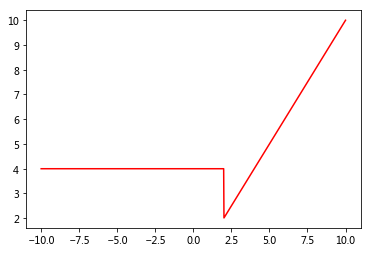

In [25]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt

x = torch.linspace(-10, 10, 1000)
y = torch.nn.functional.threshold(input=x, threshold=2, value=4)
plt.plot(x, y, color=(1, 0, 0, 1))


### relu函数

- 线性整流函数（Rectified Linear Unit, ReLU），又称修正线性单元；

```python
    torch.nn.functional.relu(input, inplace=False) → Tensor
```

- 例子代码

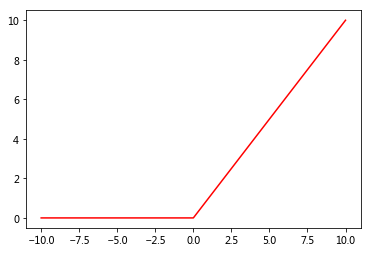

In [27]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt

x = torch.linspace(-10, 10, 1000)
y = torch.nn.functional.relu(input=x)
plt.plot(x, y, color=(1, 0, 0, 1))

### hardtanh函数

- hard正切双曲线，是tanh的增强版本
    - 使用最大与最小限制输出值范围。默认限制在`[-1, 1]`之间。

```
    torch.nn.functional.hardtanh(input, min_val=-1., max_val=1., inplace=False) → Tensor
```

- 参数说明：
     - min_val=-1.
     - max_val=1., 

- 例子代码

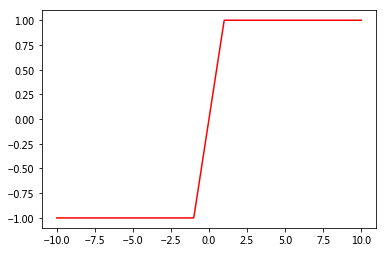

In [29]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt

x = torch.linspace(-10, 10, 1000)
y = torch.nn.functional.hardtanh(input=x)
plt.plot(x, y, color=(1, 0, 0, 1))

### relu6

- relu函数的特殊版本：
    - 输出范围现在0-6之间

```python
    torch.nn.functional.relu6(input, inplace=False) → Tensor
```

- 例子代码

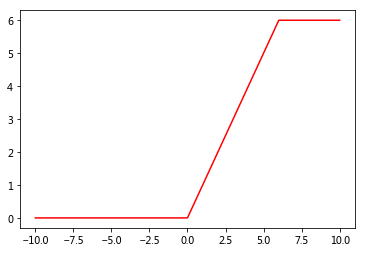

In [31]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt

x = torch.linspace(-10, 10, 1000)
y = torch.nn.functional.relu6(input=x)
plt.plot(x, y, color=(1, 0, 0, 1))

### elu函数

- 指数运算修正的线性单元；
    - $f(x) = \begin{cases}
x&x \ge 0\\
\alpha ( e^x - 1 )&x < 0\\
\end{cases}$

```python
    torch.nn.functional.elu(input, alpha=1.0, inplace=False)
```

- 参数说明：
    - input：被处理的数据
    - alpha=1.0：公式中的$\alpha$

- 例子代码

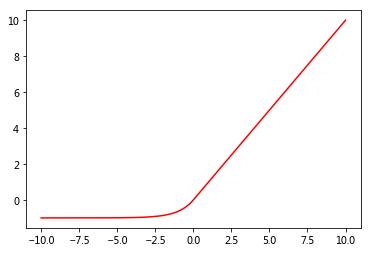

In [34]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt

x = torch.linspace(-10, 10, 1000)
y = torch.nn.functional.elu(input=x, alpha=1.0)
plt.plot(x, y, color=(1, 0, 0, 1))

### selu函数

- selu公式如下；
    - $f(x) = \begin{cases}
\lambda x&x \ge 0\\
\lambda \alpha ( e^x - 1 )&x < 0\\
\end{cases}$

    - $\lambda=1.0507009873554804934193349852946$
    - $\alpha=1.6732632423543772848170429916717$

```python
    torch.nn.functional.selu(input, inplace=False) → Tensor
```

- 例子代码

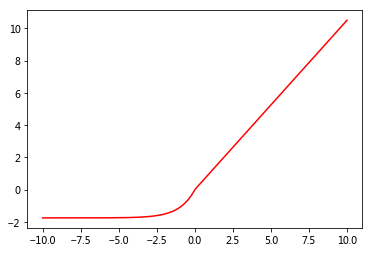

In [35]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt

x = torch.linspace(-10, 10, 1000)
y = torch.nn.functional.selu(input=x)
plt.plot(x, y, color=(1, 0, 0, 1))

### celu函数

- 函数公式如下：
    - $f(x) = \begin{cases}
x&x \ge 0\\
\alpha ( e^{\frac{x}{\alpha}} - 1 )&x < 0\\
\end{cases}$


```python
    torch.nn.functional.celu(input, alpha=1., inplace=False) → Tensor
```

- 例子代码

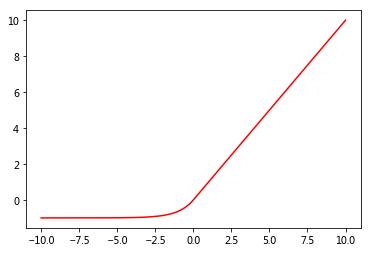

In [36]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt

x = torch.linspace(-10, 10, 1000)
y = torch.nn.functional.celu(input=x)
plt.plot(x, y, color=(1, 0, 0, 1))

### leaky_relu函数

- 函数公式如下：
    - $f(x) = \begin{cases}
x&x \ge 0\\
\dfrac{x}{\alpha}&x < 0\\
\end{cases}$

```python
    torch.nn.functional.leaky_relu(input, negative_slope=0.01, inplace=False) → Tensor
```

- 参数说明：
    - negative_slope：就是公式中的$\dfrac{1}{\alpha}$

- 例子代码

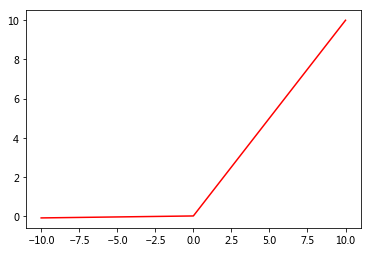

In [37]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt

x = torch.linspace(-10, 10, 1000)
y = torch.nn.functional.leaky_relu(input=x, negative_slope=0.01)
plt.plot(x, y, color=(1, 0, 0, 1))

### prelu函数

- 是leaky_relu函数参数化版本（weight需要是一个张量），下面公式中的乘法是叉乘。
- 函数公式如下：
    - $f(x) = \begin{cases}
x&x \ge 0\\
w * x&x < 0\\
\end{cases}$

```python
    torch.nn.functional.prelu(input, weight) → Tensor
```


- 例子代码

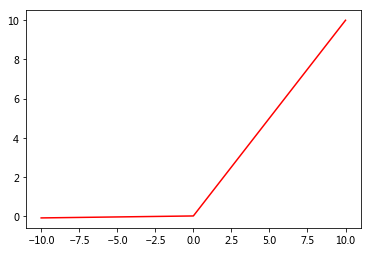

In [39]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt

x = torch.linspace(-10, 10, 1000)
y = torch.nn.functional.prelu(input=x, weight=torch.Tensor([0.01]))
plt.plot(x, y, color=(1, 0, 0, 1))

### rrelu函数

- 随机修正线性单元：
- 函数公式如下：
    - $f(x) = \begin{cases}
x&x \ge 0\\
\alpha x&x < 0\\
\end{cases}$

    - 其中$\alpha$是服从`[lower, upper)`之间的均匀分布随机概率。

```python
    torch.nn.functional.rrelu(input, lower=1./8, upper=1./3, training=False, inplace=False) → Tensor
```

- 参数：
    - 指定均匀分布的区间范围的两个参数：
        - lower=1./8
        - upper=1./3

- 例子代码

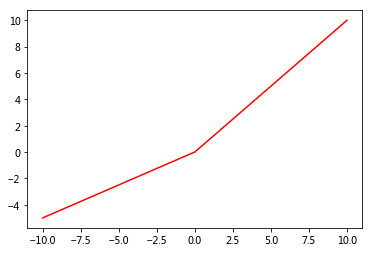

In [41]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt

x = torch.linspace(-10, 10, 1000)
y = torch.nn.functional.rrelu(input=x, lower=0.4,  upper=0.6)
plt.plot(x, y, color=(1, 0, 0, 1))

### glu函数

- 网管线性单元
- 计算公式：$GLU(a,b)=a \otimes \sigma(b)$
    - 其中$\sigma$函数就是sigmoid函数（下面会专门介绍）
    - $\otimes$是矩阵叉乘（对应元素相乘）
    - 其中的$a, b$是输入矩阵按照指定的维度一分为二形成的矩阵。
- 注意：
    - 要求input至少是2D矩阵。而且被拆分的维度必须是偶数

```python
    torch.nn.functional.glu(input, dim=-1) → Tensor
```

- 例子代码

In [45]:
import torch
x = torch.Tensor(
    [
        [1, 2, 3, 4],
        [4, 5, 6, 7],
        [7, 8, 9, 10]
    ]
) 

y =  torch.nn.functional.glu(x, dim=-1)
print(y)

tensor([[0.9526, 1.9640],
        [3.9901, 4.9954],
        [6.9991, 7.9996]])


### gelu函数

- 函数公式是：
    - $GeLU(x) = x * \Phi (x)$
        - 其中$\Phi(x)$是高斯分布函数(标准正态分布)。

```python
    torch.nn.functional.gelu(input) → Tensor
```

- 说明
    - 任何作用在标量上的函数对矩阵也是有效的，对矩阵的运算就是按照元素操作。

- 例子代码

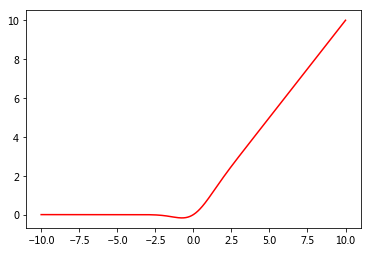

In [46]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt

x = torch.linspace(-10, 10, 1000)
y = torch.nn.functional.gelu(input=x)
plt.plot(x, y, color=(1, 0, 0, 1))

### logsigmoid函数

- 是sigmoid函数再做log对数运算，函数公式如下：
    - $f(x) = log(\dfrac{1}{1+e^{-x}})$

```python
    torch.nn.functional.logsigmoid(input) → Tensor
```

- 例子代码

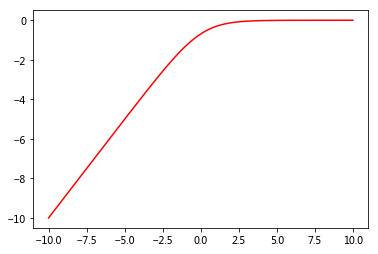

In [48]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt

x = torch.linspace(-10, 10, 1000)
y = torch.nn.functional.logsigmoid(input=x)
plt.plot(x, y, color=(1, 0, 0, 1))

### hardshrink函数

- 分段限制收缩函数，公式如下：
    - $\begin{split}f(x) = \begin{cases}
      x&\text{如： } x > \lambda \\
      x&\text{如： } x < -\lambda \\
      0&\text{其他 }
    \end{cases}\end{split}$

```python
    torch.nn.functional.hardshrink(input, lambd=0.5) → Tensor
```

- 例子代码

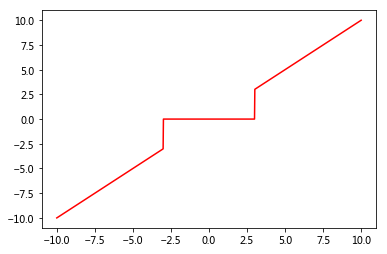

In [49]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt

x = torch.linspace(-10, 10, 1000)
y = torch.nn.functional.hardshrink(input=x, lambd=3.0)
plt.plot(x, y, color=(1, 0, 0, 1))

### tanhshrink

- 正切双曲限制收缩函数，函数公式为：
    - $Tanhshrink(x)= x − Tanh(x)$

```python
    torch.nn.functional.tanhshrink(input) → Tensor
```

- 例子代码

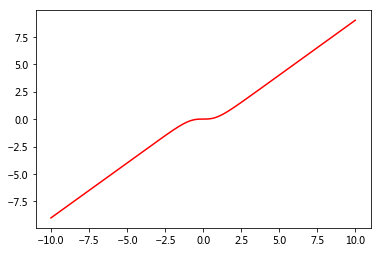

In [50]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt

x = torch.linspace(-10, 10, 1000)
y = torch.nn.functional.tanhshrink(input=x)
plt.plot(x, y, color=(1, 0, 0, 1))

### softsign函数

- 符号函数的增强版本，表示公式如下：
    - $f(x) = \dfrac{x}{1 +| x |}$

```python
    torch.nn.functional.softsign(input) → Tensor
```

- 例子代码

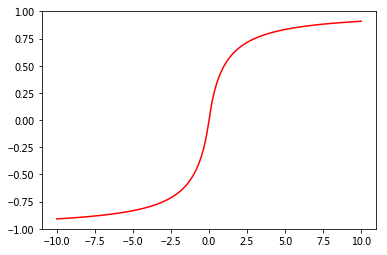

In [51]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt

x = torch.linspace(-10, 10, 1000)
y = torch.nn.functional.softsign(input=x)
plt.plot(x, y, color=(1, 0, 0, 1))

### softplus函数

- softplus可以看作是ReLu的平滑，其函数公式如下：
    - $f(x) = \ln(1 + e^{x})$

```python
    torch.nn.functional.softplus(input, beta=1, threshold=20) → Tensor
```

- 因为softplus的导数是逻辑分布函数，所以上面beta参数与threshold参数是逻辑分布中对应的参数！

- 例子代码

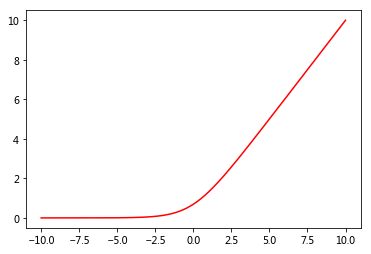

In [95]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt

x = torch.linspace(-10, 10, 1000)
y = torch.nn.functional.softplus(input=x, beta=1, threshold=20)
plt.plot(x, y, color=(1, 0, 0, 1))

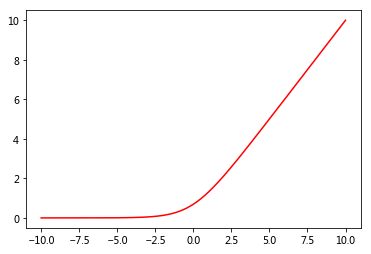

In [96]:
import torch
%matplotlib inline
import torch
import matplotlib.pyplot as plt

x = torch.linspace(-10, 10, 1000)

y = 1 + x.exp()
y = y.log()
plt.plot(x, y, color=(1, 0, 0, 1))

### softmin函数

- 是softmax函数的对偶函数
    - $softmin= softmax(-x)$
    - softmax是对数标准化

```python
    torch.nn.functional.softmin(input, dim=None, _stacklevel=3, dtype=None)
```

- 例子代码

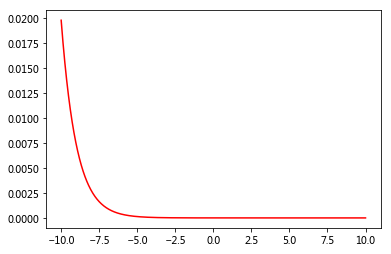

In [98]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt

x = torch.linspace(-10, 10, 1000)
y = torch.nn.functional.softmin(input=x, dim=0)
plt.plot(x, y, color=(1, 0, 0, 1))

### softmax函数

- 函数公式是：$f(x) = \dfrac{e^{x_i}}{\sum \limits _j e^{x_j}}$

- 支持多维，所以可以指定按照某个维度求和。

```python
    torch.nn.functional.softmax(input, dim=None, _stacklevel=3, dtype=None)
```

- 例子代码

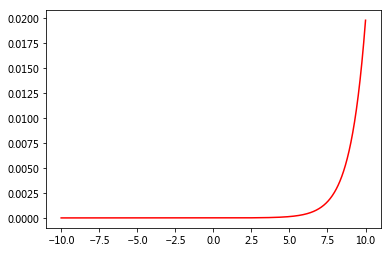

In [99]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt

x = torch.linspace(-10, 10, 1000)
y = torch.nn.functional.softmax(input=x, dim=0)
plt.plot(x, y, color=(1, 0, 0, 1))

- 手工实现softmax

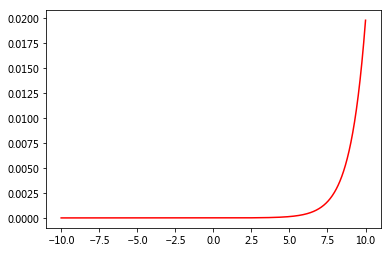

In [102]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt

x = torch.linspace(-10, 10, 1000)
s = 0
for xi in x:
    s += xi.exp()
y = x.exp()/s
plt.plot(x, y, color=(1, 0, 0, 1))

### softshrink函数

- 函数公式为：
    - $\begin{split}out = \begin{cases}
            x - \lambda, \text{if } x > \lambda \\
            x + \lambda, \text{if } x < -\lambda \\
            0,  \text{otherwise}
      \end{cases}\end{split}$

```python
    torch.nn.functional.softshrink(input, lambd=0.5) → Tensor
```

- 例子代码

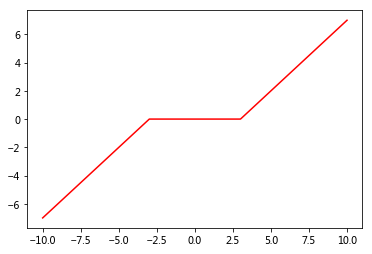

In [104]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt

x = torch.linspace(-10, 10, 1000)
y = torch.nn.functional.softshrink(input=x, lambd=3)
plt.plot(x, y, color=(1, 0, 0, 1))

### gumbel_softmax函数

- Gumbel-Softmax distribution (Link 1 Link 2) ：耿贝尔分布；
    - $p(x)=\frac{1}{\beta}e^{-z-e^{-z}}$
        - $z=\frac{x-\mu}{\beta}$

```python
    torch.nn.functional.gumbel_softmax(logits, tau=1, hard=False, eps=1e-10, dim=-1)
```

- 参数说明：
    - hard=False：离散化为one-hot向量

- 例子代码

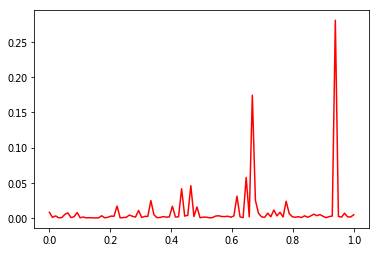

In [110]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt

x = torch.linspace(0, 1, 100)
y = torch.nn.functional.gumbel_softmax(logits=x, tau=1, hard=False)
plt.plot(x, y, color=(1, 0, 0, 1))

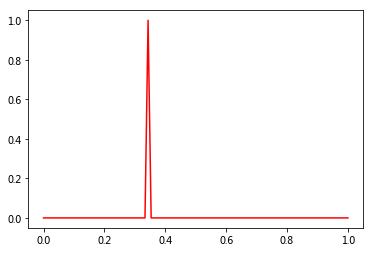

In [111]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt

x = torch.linspace(0, 1, 100)
y = torch.nn.functional.gumbel_softmax(logits=x, tau=1, hard=True)
plt.plot(x, y, color=(1, 0, 0, 1))

### log_softmax函数

- 对softmax做一个log对数运算

```python
    torch.nn.functional.log_softmax(input, dim=None, _stacklevel=3, dtype=None)
```

- 例子代码

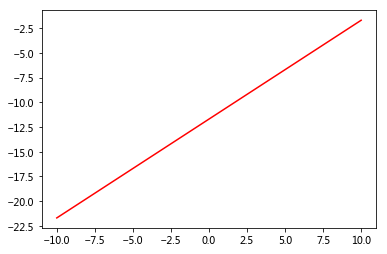

In [115]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt

x = torch.linspace(-10, 10, 100)
y = torch.nn.functional.log_softmax(input=x, dim=-1)
plt.plot(x, y, color=(1, 0, 0, 1))

### tanh函数
- 这是正切双曲线函数：$tanh(x)=\dfrac{sinh(x)}{cosh(x)}=\dfrac{e^x-e^{-x}}{e^x+e^{-x}}$
- 一个可以使用自身表示其导数的函数：
    - $\begin{align*} tanh^{'}(x)&=((e^x-e^{-x})(e^x+e^{-x}))^{'} \\ &=(e^x+e^{-x})(e^x+e^{-x})^{-1}-(e^x-e^{-x})(e^x+e^{-x})^{-2}(e^x-e^{-x})\\ &=1-\frac{(e^x-e^{-x})^{2}}{(e^x+e^{-x})^{2}}\\ &=1-tanh^2(x) \end{align*}$

```python
    torch.nn.functional.tanh(input) → Tensor
```

- 例子代码

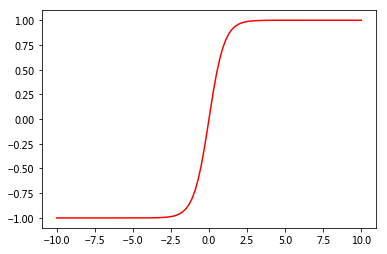

In [117]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt

x = torch.linspace(-10, 10, 100)
# y = torch.nn.functional.tanh(input=x)
y = torch.tanh(input=x)
plt.plot(x, y, color=(1, 0, 0, 1))

### sigmoid函数

- 函数公式：$f(x) = \dfrac{1}{1 + e ^ {-x}}$

- 例子代码

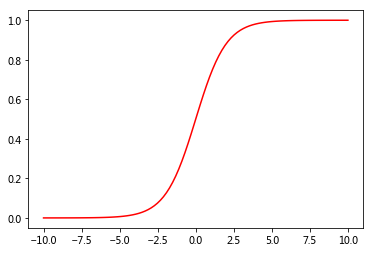

In [118]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt

x = torch.linspace(-10, 10, 100)
y = torch.sigmoid(input=x)
plt.plot(x, y, color=(1, 0, 0, 1))

## 标准化函数

- 标准函数提供了5个：
    - normalize：标准化
    - batch_norm：批量标准化
    - instance_norm：批处理实例标准化
    - layer_norm：层标准化
    - local_response_norm：局部响应标准化


### normalize函数

```python
    torch.nn.functional.normalize(
        input,    # 处理的数据
        p=2,     # 标准化使用的范数
        dim=1,   # 标准化维度
        eps=1e-12,    # 修正量（用来防止标准化中分母为0的情况）
        out=None)
```

- 标准化计算公式：
    - $v = \dfrac{v}{max{(||v||_p, \epsilon)}}$

In [122]:
import torch
x = torch.Tensor([1,2,3,4])

y = torch.nn.functional.normalize(x, p=2, dim=0)
print(y)
print(y.mean(), y.var())
print(x.norm())
print(x/x.norm())

tensor([0.1826, 0.3651, 0.5477, 0.7303])
tensor(0.4564) tensor(0.0556)
tensor(5.4772)
tensor([0.1826, 0.3651, 0.5477, 0.7303])


In [124]:
# 范数的计算：到原点的距离（范数定义的距离）为1.
import torch
x = torch.Tensor([1,2,3,4])
sum = 0
for x_ in x:
    sum += x_ * x_

print(sum)
print(sum.sqrt())

tensor(30.)
tensor(5.4772)


### batch_norm函数

- 深度学习都需要对数据做归一化
    1. 深度神经网络主要就是为了学习训练数据的分布，并在测试集上达到很好的泛化效果，但是，如果我们每一个batch输入的数据都具有不同的分布，显然会给网络的训练带来困难。
    2. 数据经过一层层网络计算后，其数据分布也在发生着变化，此现象称为Internal Covariate Shift，batchnorm就是用来解决这个分布变化的问题。

- 对神经网络的每一层做归一化的问题；
    - 假设将每一层输出后的数据都归一化到0均值，1方差，满足正太分布，但是每一层的数据分布都是标准正太分布，导致其完全学习不到输入数据的特征，因为学习到的特征分布被归一化了，因此，直接对每一层做归一化显然是不合理的。
    - 但是如果稍作修改，加入可训练的参数做归一化，那就是BatchNorm实现的了。

- Batchnorm本身上也是一种正则的方式，可以代替其他正则方式如dropout等；

```python
    torch.nn.functional.batch_norm(
        input,                      # 需要处理的数据
        running_mean,          # 均值（用来做数据预测用的：对预测数据使用这个均值与方差来标准化）
        running_var,              # 方差（用来做数据预测用的）
        weight=None,            # 缩放系数   
        bias=None,                # 位移系数
        training=False, 
        momentum=0.1,          # 动量参数（每次训练过程中，用来修正running_mean与running_var的）
        eps=1e-05)                # 防止为0的误差量
```

In [161]:
import torch
x = torch.Tensor(
    [
        [1],
        [2],
        [3],
        [4]
    ]
)

m = torch.Tensor([0.0])
# m = x.mean(dim=0)
v = torch.Tensor([1.0])

w = torch.Tensor([1.0])     # w与b是需要学习的，因为标准化容易丢弃已经学习的规则，使用参数是为了保留已学习的规则。
w.requires_grad=True
b = torch.Tensor([0.0])
b.requires_grad=True

y = torch.nn.functional.batch_norm(
    input=x, 
    running_mean=m,      # 指定标准化需要的均值
    running_var=v,           # 指定标准需要的方差
    weight=w,                 # 指定需要训练的标准化特征
    bias=b,                     # 指定需要训练的标准化特征
    momentum=0.1)
print(y)   
print(m,v)

# momentum参数在函数中没有使用

tensor([[1.0000],
        [2.0000],
        [3.0000],
        [4.0000]], grad_fn=<NativeBatchNormBackward>)
tensor([0.]) tensor([1.])


- 上面还不是最适合的使用方式，下面是对实际场景的最直观使用。
    - 下面x的深度是3，所以m，v必须是3维数。

In [251]:
import torch
x= torch.randn(4, 3, 5, 5)   # 4张3通道5*5的图像

m = x.mean(dim=(0,2,3))   
v = x.var(dim=(0,2,3))
print(m,v)
w = torch.Tensor([1.0, 1.0, 1.0])     # w与b是需要学习的，因为标准化容易丢弃已经学习的规则，使用参数是为了保留已学习的规则。
w.requires_grad=True
b = torch.Tensor([0.0, 0.0, 0.0])
b.requires_grad=True

y = torch.nn.functional.batch_norm(
    input=x, 
    running_mean=m,      # 指定标准化需要的均值
    running_var=v,           # 指定标准需要的方差
    weight=w,                 # 指定需要训练的标准化特征
    bias=b,                     # 指定需要训练的标准化特征
    momentum=0.1)
print(y)   
print(m,v)

# momentum参数在函数中没有使用

tensor([-0.1099, -0.1201,  0.0899]) tensor([1.1323, 1.0076, 1.1978])
tensor([[[[ 0.6039, -0.5582,  0.4959, -0.6427, -0.5870],
          [-0.3643,  0.5706, -0.5763,  1.4945, -1.4511],
          [ 0.1614,  0.5990,  1.9546, -0.3642,  1.4048],
          [ 0.7057, -0.9043,  0.1523,  0.9368, -0.2871],
          [ 0.8770, -0.9029,  0.2469, -0.6572, -0.2440]],

         [[ 0.7871, -2.0743,  0.7447,  1.3778,  0.0870],
          [ 0.3714,  0.2540, -0.3870, -0.9554, -0.9491],
          [ 2.3781, -0.0893, -0.0280,  1.3762,  0.4648],
          [-1.1302, -1.2012,  1.0125,  1.7782,  0.1390],
          [-0.0499, -0.1794,  0.4153, -0.4797, -1.5406]],

         [[-0.3106,  0.3042, -2.6128, -0.6955,  0.1389],
          [ 0.6331,  0.5983, -0.3249, -1.0146, -0.3954],
          [ 0.7133, -1.6992, -0.0674, -0.0610, -0.1267],
          [ 2.2547,  1.1713, -1.6066,  1.9786,  1.5711],
          [ 0.9024, -0.9147,  0.6853,  0.2226, -0.0866]]],


        [[[-0.1178,  0.2178, -0.4152, -0.2686,  1.8236],
          [

- 关于batch_norm的一段代码，可以很好的诠释batch_norm的含义

```python

    def Batchnorm_simple_for_train(x, gamma, beta, bn_param):
        """
        param:x    : 输入数据，设shape(B,L)
        param:gama : 缩放因子  γ
        param:beta : 平移因子  β
        param:bn_param   : batchnorm所需要的一些参数
            eps      : 接近0的数，防止分母出现0
            momentum : 动量参数，一般为0.9， 0.99， 0.999
            running_mean ：滑动平均的方式计算新的均值，训练时计算，为测试数据做准备
            running_var  : 滑动平均的方式计算新的方差，训练时计算，为测试数据做准备
        """
        running_mean = bn_param['running_mean']  #shape = [B]
        running_var = bn_param['running_var']    #shape = [B]
        results = 0. # 建立一个新的变量

        x_mean=x.mean(axis=0)  # 计算x的均值
        x_var=x.var(axis=0)    # 计算方差
        x_normalized=(x-x_mean)/np.sqrt(x_var+eps)       # 归一化
        results = gamma * x_normalized + beta            # 缩放平移

        running_mean = momentum * running_mean + (1 - momentum) * x_mean
        running_var = momentum * running_var + (1 - momentum) * x_var

        #记录新的值
        bn_param['running_mean'] = running_mean
        bn_param['running_var'] = running_var 

        return results , bn_param


```

### instance_norm函数

- 与batch_norm，layer_norm类似的函数，区别在于：
    - 计算平均值的方式不同，最终把每个通道的和起来
    - 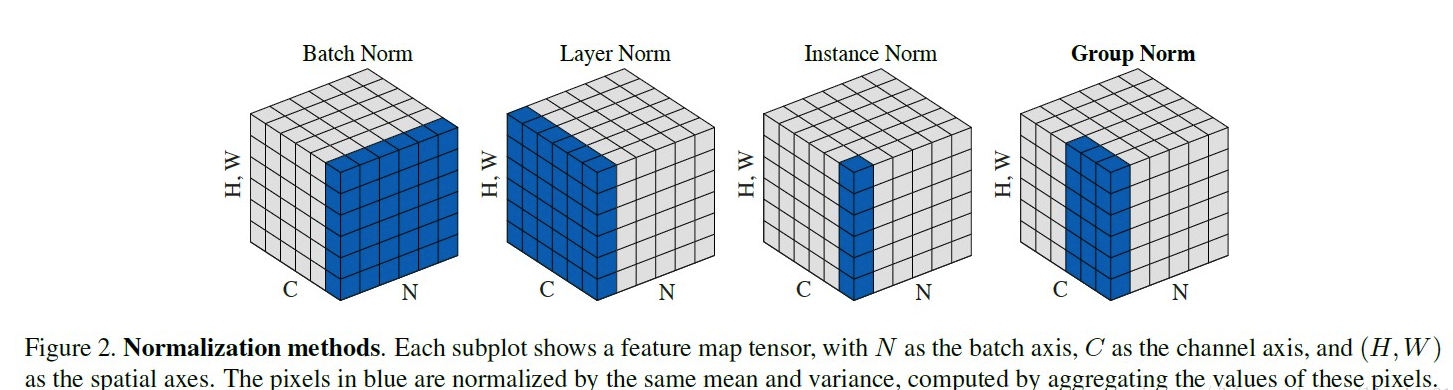

- 将输入的图像shape记为`[N, C, H, W]`，这几个方法主要的区别就是在，
    - Batch Norm是在batch上，对NHW做归一化，就是对每个单一通道输入进行归一化，这样做对小batchsize效果不好；
    - Layer Norm在通道方向上，对CHW归一化，就是对每个深度上的输入进行归一化，主要对RNN作用明显；
    - Instance Norm在图像像素上，对HW做归一化，对一个图像的长宽即对一个像素进行归一化，用在风格化迁移；
    - Group Norm将channel分组，有点类似于LN，只是GN把channel也进行了划分，细化，然后再做归一化；
    - Switchable Norm是将BN、LN、IN结合，赋予权重，让网络自己去学习归一化层应该使用什么方法。


- instance_norm函数说明：

```python
    torch.nn.functional.instance_norm(
        input, 
        running_mean=None,     # 可以为None
        running_var=None, 
        weight=None, 
        bias=None, 
        use_input_stats=True, momentum=0.1, eps=1e-05)
```

In [252]:
import torch
x= torch.randn(4, 3, 5, 5)   # 4张3通道5*5的图像

m = x.mean(dim=(0,2,3), keepdim=False)   # N（0），C（1），H（2），W（3）
v = x.var(dim=(0,2,3), keepdim=False)
print(m.shape)
w = torch.ones(3)     # w与b是需要学习的，因为标准化容易丢弃已经学习的规则，使用参数是为了保留已学习的规则。
w.requires_grad=True
b = torch.zeros(3)
b.requires_grad=True

y = torch.nn.functional.instance_norm(
    input=x, 
    running_mean=m,    
    running_var=v,
    weight=w, bias=b
)
print(y)   
# 比较batch_norm与instance_norm的结果差别
y = torch.nn.functional.batch_norm(
    input=x, 
    running_mean=m,    
    running_var=v,
    weight=w, bias=b
)
print(y)   

torch.Size([3])
tensor([[[[-1.3300e+00, -1.0276e+00,  3.0897e-01,  9.5767e-02,  3.2338e-01],
          [-4.1176e-01,  7.4911e-01, -6.9988e-01,  2.9321e-01,  7.2987e-01],
          [ 1.3905e+00,  5.4397e-01,  1.2827e-02,  3.2809e-01,  7.4175e-01],
          [ 3.9900e-01, -2.5250e+00,  6.4288e-01,  1.8031e+00, -6.0249e-02],
          [ 1.0510e+00, -5.5906e-01,  2.5902e-01, -2.1903e+00, -8.6867e-01]],

         [[ 4.4713e-01,  8.9750e-01, -9.6316e-01,  3.1501e-01,  1.5213e+00],
          [-3.3827e-01, -7.3737e-01, -9.3462e-01,  1.7493e+00,  1.0172e+00],
          [ 4.7460e-01, -2.6951e-01, -1.1510e+00, -7.1324e-01, -1.1702e+00],
          [ 1.0441e+00, -1.7336e+00,  1.2532e-01, -7.4906e-01, -8.4268e-01],
          [ 1.6433e-01,  1.9831e+00, -6.9415e-01, -6.0049e-01,  1.1584e+00]],

         [[-2.3036e+00,  7.9183e-01, -2.5915e-01,  1.3214e+00, -1.5231e+00],
          [ 4.1672e-02,  5.2620e-01,  3.9970e-01,  4.4207e-01, -2.3129e-01],
          [-4.2022e-01, -8.8784e-01,  8.0396e-01,  1.745

### layer_norm函数

- 对指定的输入中最后几个维度标准化

```python
    torch.nn.functional.layer_norm(input, normalized_shape, weight=None, bias=None, eps=1e-05)
```

In [259]:
import torch
x= torch.randn(4, 3, 5, 5)   # 4张3通道5*5的图像

w = torch.ones(3, 5, 5)     # 对最后两个维度做标准化
w.requires_grad=True
b = torch.zeros(3, 5,5)
b.requires_grad=True

y = torch.nn.functional.layer_norm(
    input=x, 
    normalized_shape=(3, 5, 5),
    weight=w, bias=b
)
print(y[0,0,:,:]) 

tensor([[ 0.0917,  0.2445,  0.1294,  0.0352,  0.5847],
        [ 1.7303, -1.4383, -1.1723,  0.3757,  0.1029],
        [ 0.1677, -0.1781,  1.3524, -0.0983, -0.3715],
        [ 1.7907, -0.6600,  2.0479, -0.0905, -0.1329],
        [ 0.6516,  0.1149,  0.6535, -0.3212,  0.4425]],
       grad_fn=<SliceBackward>)


## 距离函数

- Torch提供三种距离计算方式：
    - 计算两个向量的欧氏距离（2-范数）：pairwise_distance
    - 计算相似距离（两个向量夹角的余弦）：cosine_similarity
        - 这个实际上是两个矩阵的相关性度量（向量正交就是无关，夹角90度，余弦为0；向量线性相关，夹角0度，余弦为1）
    - 计算矩阵每行之间的欧氏距离：pdist

- 注意：
    - 实际在数学上根据不同的应用，有很多种距离的定义方式。
    
- 下面使用例子说明：

### pairwise_distance函数

```python
    torch.nn.functional.pairwise_distance(x1, x2, p=2.0, eps=1e-06, keepdim=False)
```

In [261]:
import torch
# 两个点之间的距离
t1 = torch.Tensor([[0, 1]])
t2 = torch.Tensor([[1, 0]])

print(torch.nn.functional.pairwise_distance(t1, t2))

tensor([1.4142])


In [268]:
import torch
# 对应两个向量之间的距离，行数相同（1->1），否则其中一个只能是0行（1->多）。
t1 = torch.Tensor(
    [
        [0, 1],
        [0, 0]
    ]
)
t2 = torch.Tensor(
    [
        [1, 0],
        [0,0]
    ]
)

print(torch.nn.functional.pairwise_distance(t1, t2))

tensor([1.4142e+00, 1.4142e-06])


### cosine_similarity函数

```python
    torch.nn.functional.cosine_similarity(x1, x2, dim=1, eps=1e-8) → Tensor
```

In [272]:
t1 = torch.Tensor(
    [
        [0, 1],
        [0, 1]
    ]
)
t2 = torch.Tensor(
    [
        [1, 0],
        [0,1]
    ]
)

print(torch.nn.functional.cosine_similarity(t1, t2, dim=1))   # 按照行计算相似度

tensor([0., 1.])


### pdist函数

```python
    torch.nn.functional.pdist(input, p=2) → Tensor
```

In [276]:
t1 = torch.Tensor(
    [
        [0, 1],
        [1, 1],
        [0.5, 0.5],
        [0,0]
    ]
)

print(torch.nn.functional.pdist(t1))   # 按照全排列方式计算

tensor([1.0000, 0.7071, 1.0000, 0.7071, 1.4142, 0.7071])


----